In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
boston=pd.read_csv("D:/Machine Learning Practical/Lab Exercises/Lab 2/Program 2/boston.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


1. For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [28]:
#getting column names
col=boston.columns

#emptyd dataframe
SLR=pd.DataFrame()

B0=[]
B1=[]
#std_err=[]
t_val=[]
p_val=[]
r_sqr=[]
adj_rsqr=[]

for i in range(13):
    y=pd.DataFrame(boston['crim'])
    X=pd.DataFrame(boston[col[i+1]])

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
    X_train=sm.add_constant(X_train)

    model_1 = sm.OLS(y_train,X_train)
    m=model_1.fit()
    m1=m.params
    
    B0.append(m1[0])
    B1.append(m1[1])
    t_val.append(m.tvalues[1])
    p_val.append(m.pvalues[1])
    r_sqr.append(m.rsquared)
    adj_rsqr.append(m.rsquared_adj)
   
SLR= pd.DataFrame({"Intercept":B0,
                    "B1":B1,
                    "t-value":t_val,
                    "p-value":p_val,
                    "R-Squared":r_sqr,
                    "Adjusted R-Sqr":adj_rsqr
                          })
#assigning row names
df=['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
SLR["Regressors"]=df

#setting index
SLR.set_index("Regressors",inplace=True)
#Final TABLE
SLR


,Intercept,B1,t-value,p-value,R-Squared,Adjusted R-Sqr
Regressors,,,,,,
zn,4.600911,-0.075488,-3.997540,7.800252e-05,0.043427,0.040710
indus,-2.106087,0.517366,8.590880,2.844436e-16,0.173327,0.170979
chas,3.929834,-2.205476,-1.357313,1.755514e-01,0.005207,0.002380
nox,-13.529790,31.105772,8.952798,2.034058e-17,0.185473,0.183159
rm,23.798321,-3.207102,-5.064129,6.631726e-07,0.067909,0.065261
age,-4.071737,0.113436,7.617150,2.418034e-13,0.141507,0.139068
dis,9.802337,-1.583134,-8.113578,8.295946e-15,0.157552,0.155159
rad,-2.296067,0.623994,15.806607,6.595947e-43,0.415136,0.413474
tax,-8.640715,0.030277,14.238947,1.189970e-36,0.365477,0.363675


Conclusion:  Except for the independent variable chas, which does not appear to be associated with the local crime rate, all the "beta1" values for the independent variables are substantially different from zero and can be used as predictors for the dependent variable "crim".

However, if we compare the r_squared values and adj_r_squared values, predictor ”rad” seems to perform better out of all the 12 models.*

2. Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [29]:
#MLR Model

#Response and Predictor Variables
y1=pd.DataFrame(boston['crim'])
X1=pd.DataFrame(boston[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'black', 'lstat', 'medv']])

#Model
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.3, random_state=1)
X_train1=sm.add_constant(X_train1)

model_2 = sm.OLS(y_train1,X_train1)
m2=model_2.fit()

#Summary
m2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     26.76
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.61e-44
Time:                        20:01:31   Log-Likelihood:                -1135.7
No. Observations:                 354   AIC:                             2299.
Df Residuals:                     340   BIC:                             2354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2548      8.330      3.032      0.003       8.869      41.641
zn             0.0570      0.023      2.476      0.014       0.012       0.102
indus         -0.0675      0.095     -0.711      0.477      -0.254       0.119
chas          -0.9899      1.220     -0.811      0.418      -3.390       1.410
nox          -13.2673      5.928     -2.238      0.026     -24.928      -1.607
rm            -0.4726      0.669     -0.706      0.481      -1.789       0.844
age            0.0021      0.020      0.104      0.917      -0.038       0.042
dis           -1.0913      0.328     -3.326      0.001      -1.737      -0.446
rad            0.6018      0.104      5.799      0.000       0.398       0.806
tax           -0.0044      0.006     -0.722      0.471      -0.017       0.008
ptratio       -0.2585      0.221     -1.168      0.244      -0.694       0.177
black         -0.0135      0.004     -3.216      0.001      -0.022      -0.005
lstat          0.1515      0.085      1.783      0.075      -0.016       0.319
medv          -0.1501      0.066     -2.259      0.025      -0.281      -0.019
==============================================================================
Omnibus:                      413.116   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26448.931
Skew:                           5.251   Prob(JB):                         0.00
Kurtosis:                      44.023   Cond. No.                     1.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Conclusion:

We can say that the null hypothesis for regressors “zn”, "nox",“dis”, “rad”,"black" and “medv” can be rejected since p value less than 0.05 . From the summary we infer that the overall crime rate across all tracts on an average would be 13.78 (baseline model). The regressors “indus”, “chas”, “nox”, "rm”, “dis”, “tax”, “ptratio”,"black" and “medv” are negatively related with the expectation of the mean of “crime.

From the R2 value we can concur that 48.7% variation in crime rate can be explained by the regressors. Hence when we consider all variables together we are able to explain higher variation in the crime rate. 

3. How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Answer: Multivariate regression found 6 of 12 predictors to be significnat where univariate regression found 11 of 12 significant. Multivariate regression seems to find significantly less predictors to be significant.

const      25.254838
zn          0.057025
indus      -0.067457
chas       -0.989914
nox       -13.267338
rm         -0.472618
age         0.002133
dis        -1.091327
rad         0.601774
tax        -0.004434
ptratio    -0.258458
black      -0.013474
lstat       0.151490
medv       -0.150089
dtype: float64

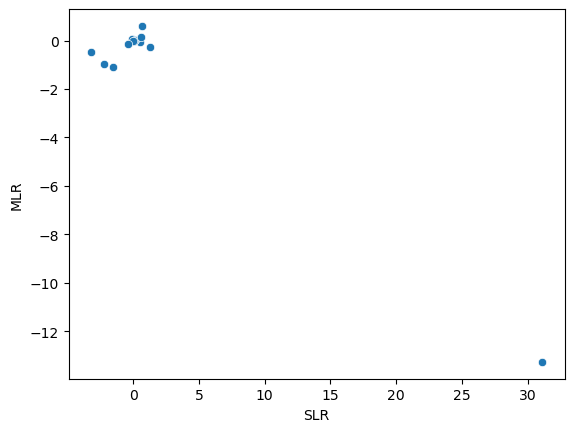

In [32]:
# plot displaying the univariate regression coefficients from (a) on the x-axis, 
#and the multiple regression coefficients from (b) on the y-axis.

#Creating a dataframe with SLR AND MLR B1
a=pd.DataFrame(SLR["B1"])

a.rename(columns = {'B1':'SLR'}, inplace = True)
a["MLR"]=m2.params[1:14]

sns.scatterplot(x=a["SLR"],y=a["MLR"])


4. Is there evidence of non-linear association between any of the predictors and the response?

In [189]:
import statsmodels.formula.api as smf

models_d = [smf.ols(formula='crim ~ {0} + np.power({0}, 2) + np.power({0}, 3)'.format(f), data=boston).fit()
            for f in boston.columns[1:]]

for model in models_d:
    dp = 4
    display(pd.DataFrame({'coef':    np.around(model.params, dp),
                          'std_err': np.around(model.bse, dp),
                          't':       np.around(model.params / model.bse, dp),
                          'P>|t|':   np.around(model.pvalues, dp),
                          '[0.025':  np.around(model.conf_int(alpha=0.05)[0], dp),
                          '0.975]':  np.around(model.conf_int(alpha=0.05)[1], dp)}))

,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,4.8461,0.4330,11.1922,0.0000,3.9954,5.6967
zn,-0.3322,0.1098,-3.0252,0.0026,-0.5479,-0.1164
"np.power(zn, 2)",0.0065,0.0039,1.6791,0.0938,-0.0011,0.0141
"np.power(zn, 3)",-0.0000,0.0000,-1.2030,0.2295,-0.0001,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,3.6626,1.5740,2.3269,0.0204,0.5702,6.7550
indus,-1.9652,0.4820,-4.0773,0.0001,-2.9122,-1.0182
"np.power(indus, 2)",0.2519,0.0393,6.4070,0.0000,0.1747,0.3292
"np.power(indus, 3)",-0.0070,0.0010,-7.2920,0.0000,-0.0089,-0.0051


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,3.7444,0.3961,9.4530,0.0000,2.9662,4.5227
chas,-0.6309,0.5020,-1.2567,0.2094,-1.6173,0.3554
"np.power(chas, 2)",-0.6309,0.5020,-1.2567,0.2094,-1.6173,0.3554
"np.power(chas, 3)",-0.6309,0.5020,-1.2567,0.2094,-1.6173,0.3554


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,233.0866,33.6431,6.9282,0.0,166.9880,299.1852
nox,-1279.3713,170.3975,-7.5082,0.0,-1614.1513,-944.5912
"np.power(nox, 2)",2248.5441,279.8993,8.0334,0.0,1698.6257,2798.4624
"np.power(nox, 3)",-1245.7029,149.2816,-8.3446,0.0,-1538.9966,-952.4091


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,112.6246,64.5172,1.7457,0.0815,-14.1325,239.3817
rm,-39.1501,31.3115,-1.2503,0.2118,-100.6679,22.3676
"np.power(rm, 2)",4.5509,5.0099,0.9084,0.3641,-5.2920,14.3938
"np.power(rm, 3)",-0.1745,0.2637,-0.6615,0.5086,-0.6927,0.3437


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-2.5488,2.7691,-0.9204,0.3578,-7.9893,2.8918
age,0.2737,0.1864,1.4683,0.1427,-0.0925,0.6398
"np.power(age, 2)",-0.0072,0.0036,-1.9878,0.0474,-0.0144,-0.0001
"np.power(age, 3)",0.0001,0.0000,2.7237,0.0067,0.0000,0.0001


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,30.0476,2.4459,12.2850,0.0,25.2422,34.8530
dis,-15.5544,1.7360,-8.9600,0.0,-18.9650,-12.1437
"np.power(dis, 2)",2.4521,0.3464,7.0783,0.0,1.7715,3.1327
"np.power(dis, 3)",-0.1186,0.0204,-5.8135,0.0,-0.1587,-0.0785


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-0.6055,2.0501,-0.2954,0.7678,-4.6334,3.4223
rad,0.5127,1.0436,0.4913,0.6234,-1.5376,2.5631
"np.power(rad, 2)",-0.0752,0.1485,-0.5061,0.6130,-0.3670,0.2167
"np.power(rad, 3)",0.0032,0.0046,0.7031,0.4823,-0.0058,0.0122


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,19.1836,11.7955,1.6263,0.1045,-3.9911,42.3583
tax,-0.1533,0.0957,-1.6023,0.1097,-0.3413,0.0347
"np.power(tax, 2)",0.0004,0.0002,1.4877,0.1375,-0.0001,0.0008
"np.power(tax, 3)",-0.0000,0.0000,-1.1668,0.2439,-0.0000,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,477.1840,156.7950,3.0434,0.0025,169.1288,785.2393
ptratio,-82.3605,27.6439,-2.9793,0.0030,-136.6726,-28.0485
"np.power(ptratio, 2)",4.6353,1.6083,2.8821,0.0041,1.4755,7.7952
"np.power(ptratio, 3)",-0.0848,0.0309,-2.7433,0.0063,-0.1455,-0.0241


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,18.2637,2.3049,7.9238,0.0000,13.7353,22.7921
black,-0.0836,0.0563,-1.4834,0.1386,-0.1942,0.0271
"np.power(black, 2)",0.0002,0.0003,0.7162,0.4742,-0.0004,0.0008
"np.power(black, 3)",-0.0000,0.0000,-0.6078,0.5436,-0.0000,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,1.2010,2.0286,0.5920,0.5541,-2.7847,5.1866
lstat,-0.4491,0.4649,-0.9660,0.3345,-1.3624,0.4643
"np.power(lstat, 2)",0.0558,0.0301,1.8522,0.0646,-0.0034,0.1149
"np.power(lstat, 3)",-0.0009,0.0006,-1.5170,0.1299,-0.0020,0.0003


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,53.1655,3.3563,15.8405,0.0,46.5714,59.7597
medv,-5.0948,0.4338,-11.7438,0.0,-5.9472,-4.2425
"np.power(medv, 2)",0.1555,0.0172,9.0455,0.0,0.1217,0.1893
"np.power(medv, 3)",-0.0015,0.0002,-7.3120,0.0,-0.0019,-0.0011


#Interpretation: Here based on the factor of significance we can decide whether a model has non linear association between its regressor and response variable.

#For the 1st regessor the cubic poly is not statistically significant but the quadratic is. Hence Non Linear association is there.